In [1]:
# instead of CNN only FFNN is used: my repre combines better with CNN

import warnings
warnings.filterwarnings('ignore')
import pandas as pd

import tensorflow as tf
import keras
import numpy as np

from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from keras.models import Sequential, Model

from sklearn.model_selection import GridSearchCV

from keras.layers import Activation, Dense

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from keras.utils.training_utils import multi_gpu_model

from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

from keras.layers import Dense, Dropout

from keras.layers.core import Dense, Dropout, Activation, Flatten


Using TensorFlow backend.


In [2]:
cutoff=1000000 #all

column_names = ['lambda1', 'lambda2', 'turnover', 'sampling_frac', 'tree_size', 'mu1', 'mu2', 'net_rate1', 'net_rate2', 'q01', 'q10', 'lambda2_ratio', 'q01_ratio']

param_train = pd.read_csv('.', nrows=cutoff, header=None, sep='\t', index_col=0, skiprows=1)
param_test = pd.read_csv('.', sep='\t', header=None, index_col=0, skiprows=1)


def rename_columns(df, names):
    df = df.rename(columns={i: names[int(i)-1] for i in df.columns})
    return df

param_train = rename_columns(param_train, column_names)
param_test = rename_columns(param_test, column_names)


encoding_train = pd.read_csv('.', sep="\t", header=None, nrows=cutoff, index_col=0)
encoding_test = pd.read_csv('.', sep="\t", header=None, index_col=0)
#encoding_CI = pd.read_csv('../../../results_BDSS_var_Nov_2_filtered/final_data/CI_sumstat.csv', sep="\t", header=None)

#indexes:

encoding_train.index = param_train.index
encoding_test.index = param_test.index

chemin = 'full_tree/all_samp_input/'

#valid_set_nb=10000


expname='_1000000_longest_ffnn_absolute_error'


In [ ]:
# check
param_test

In [3]:
# check
print(encoding_test.shape)
print(param_train)

(10000, 1005)
          lambda1   lambda2  turnover  sampling_frac  tree_size       mu1  \
0                                                                           
0        0.684771  0.355492  0.357863       0.300208        385  0.245054   
1        0.758572  0.729672  0.320432       0.240018        447  0.243071   
2        0.469190  0.432420  0.011880       0.939380        355  0.005574   
3        0.942854  0.634607  0.547720       0.265083        285  0.516420   
4        0.036203  0.032677  0.830925       0.168075        464  0.030082   
5        0.738566  0.361426  0.072046       0.587160        434  0.053211   
6        0.251288  0.081697  0.238428       0.972872        363  0.059914   
7        0.681618  0.625235  0.595280       0.352126        313  0.405754   
8        0.151692  0.064953  0.299780       0.373810        434  0.045474   
9        0.229102  0.192242  0.552975       0.055922        269  0.126688   
10       0.150260  0.172537  0.774981       0.571667        46

In [4]:
# check
encoding_test

,1,2,3,4,5,6,7,8,9,10,...,996,997,998,999,1000,1001,1002,1003,1004,1005
0,,,,,,,,,,,,,,,,,,,,,
0,8.373750,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,260.0,198.0,9.864166
1,9.457997,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,398.0,40.0,4.385125
2,10.888310,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,337.0,137.0,1.619759
3,10.035470,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,225.0,156.0,10.540108
4,21.704393,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,198.0,62.0,1.287025
5,9.243079,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,282.0,8.0,1.201073
6,28.906457,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,348.0,63.0,2.769603
7,18.218173,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,319.0,150.0,1.962981
8,11.023948,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,377.0,45.0,0.819214


In [5]:
#correctly reshape parameters (rescaling) and encodings (remove nb of each type + rescale factor):

### TRAINING SET: PARAMETER VALUES
# rescaling factor
param_train['norm_factor'] = encoding_train[1005]
# rescale target values according to scaling factor
param_train['net_rat1_rescaled'] = param_train['net_rate1']*param_train['norm_factor']
param_train['net_rat2_rescaled'] = param_train['net_rate2']*param_train['norm_factor']
param_train['lambda1_rescaled'] = param_train['lambda1']*param_train['norm_factor']
param_train['lambda2_rescaled'] = param_train['lambda2']*param_train['norm_factor']
param_train['q01_rescaled'] = param_train['q01']*param_train['norm_factor']

### TESTING SET: PARAMETER VALUES
# rescaling factor
param_test['norm_factor'] = encoding_test[1005]
# rescale target values
param_test['net_rat1_rescaled'] = param_test['net_rate1']*param_test['norm_factor']
param_test['net_rat2_rescaled'] = param_test['net_rate2']*param_test['norm_factor']
param_test['lambda1_rescaled'] = param_test['lambda1']*param_test['norm_factor']
param_test['lambda2_rescaled'] = param_test['lambda2']*param_test['norm_factor']
param_test['q01_rescaled'] = param_test['q01']*param_test['norm_factor']


In [6]:
encoding_train.shape

(1000000, 1002)

In [7]:
#Choice of the parameters to predict

target_1 = "turnover"
target_2 = "lambda1_rescaled"
target_3 = "lambda2_rescaled"
target_4 = "q01_rescaled"

targets = pd.DataFrame(param_train[[target_1, target_2, target_3, target_4]])
targets_test = pd.DataFrame(param_test[[target_1, target_2, target_3, target_4]])

features = encoding_train
features_test = encoding_test

valid_set_nb = 10000

In [8]:
#Add the known sampling fraction into the representation (both train and test sets)
add_target = "sampling_frac"
added_targets = pd.DataFrame(param_train[add_target])
features['1003'] = added_targets


added_targets2 = pd.DataFrame(param_test[add_target])
features_test['1003'] = added_targets2

In [9]:
valid_frac = valid_set_nb/features.shape[0]
train_size_frac = (features.shape[0]-valid_set_nb)/features.shape[0]

(1000000, 1003)
(1000000, 4)


In [10]:
features.describe()

,1,2,3,4,5,6,7,8,9,10,...,994,995,996,997,998,999,1000,1001,1002,1003
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,12.944224,1.230399,1.216843,1.208558,1.204985,1.205514,1.204540,1.205647,1.205907,1.206997,...,0.303229,0.265225,0.226262,0.189265,0.150695,0.112986,0.074533,0.038364,0.0,0.505139
std,6.720562,0.421088,0.412095,0.406278,0.403691,0.404077,0.403365,0.404174,0.404363,0.405154,...,2.259115,2.111479,1.956243,1.793849,1.601739,1.392633,1.131958,0.818336,0.0,0.285868
min,3.583796,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.010002
25%,8.889450,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.257530
50%,11.274122,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.505221
75%,14.892701,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.752787
max,145.790677,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,145.398897,145.566123,145.786351,111.993926,114.631904,114.893640,115.183355,112.095143,0.0,0.999999


In [11]:
#Standardization of the input features
"""
scale = StandardScaler()
features = scale.fit_transform(features)
features_test = scale.transform(features_test)
"""

X = features
Y = targets

# Split of the Input Data into a Train and a Test DataSet
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_size_frac, shuffle = False)

Y_test = targets_test
X_test = features_test

In [12]:
print(features.shape)

(1000000, 1003)


In [13]:
#Creation of the Network Model

def build_model():
    model = Sequential()
    
    model.add(Dense(64, input_dim=1003, activation='elu'))
    keras.layers.Dropout(0.5)
    model.add(Dense(64, activation='elu'))
    keras.layers.Dropout(0.5)
    model.add(Dense(32, activation='elu'))
    keras.layers.Dropout(0.5)
    model.add(Dense(16, activation='elu'))
    keras.layers.Dropout(0.5)
    model.add(Dense(8, activation='elu'))
    keras.layers.Dropout(0.5)
    model.add(Dense(4, activation='elu'))
    model.summary()
    return model

In [14]:
#Building of the model

from keras import losses

#model initiation
model = build_model()

#Possibility of using a "multi gpu" estimator (but doesn't work quite well for me...), and other optimizers (the default Adam optimizer seems to be the better one, though)
'''
parallel_estimator = multi_gpu_model(model, gpus=2)
optimizer = tf.train.RMSPropOptimizer(0.001)
'''

estimator = model

#Adam optimizer, loss measure: mean absolute error, metrics measured: MAPE
estimator.compile(loss='mae', optimizer = 'Adam', metrics=[losses.mean_absolute_percentage_error])

#early stopping to avoid overfitting
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

#display training progress for each completed epoch.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

# maximum number of EPOCHS, ie full training cycles on the whole training dataset (how many times we see the same training set)
EPOCHS = 10000

#Training of the Network, with an independent validation set
history = estimator.fit(X, Y, verbose = 1, epochs=EPOCHS, validation_split=valid_frac, batch_size=8000, callbacks=[early_stop, PrintDot()])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                64256     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 36        
Total params: 71,196
Trainable params: 71,196
Non-trainable params: 0
_________________________________________________________________
Train 

990000/990000 [==============================] - 16s 16us/step - loss: 0.3190 - mean_absolute_percentage_error: 195.4630 - val_loss: 0.3317 - val_mean_absolute_percentage_error: 134.3904
.Epoch 76/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.3161 - mean_absolute_percentage_error: 158.9709 - val_loss: 0.2884 - val_mean_absolute_percentage_error: 101.9331
.Epoch 77/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2920 - mean_absolute_percentage_error: 203.9283 - val_loss: 0.2772 - val_mean_absolute_percentage_error: 98.6943
.Epoch 78/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2779 - mean_absolute_percentage_error: 205.1315 - val_loss: 0.3441 - val_mean_absolute_percentage_error: 127.1908
.Epoch 79/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.3073 - mean_absolute_percentage_error: 233.8333 - val_loss: 0.2724 - val_mean_absolute_percentage_error: 88.7981
.Ep

990000/990000 [==============================] - 16s 16us/step - loss: 0.2344 - mean_absolute_percentage_error: 169.4394 - val_loss: 0.2459 - val_mean_absolute_percentage_error: 94.6679
.Epoch 156/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2342 - mean_absolute_percentage_error: 171.5161 - val_loss: 0.2324 - val_mean_absolute_percentage_error: 92.3580
.Epoch 157/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2414 - mean_absolute_percentage_error: 173.0086 - val_loss: 0.3093 - val_mean_absolute_percentage_error: 91.6884
.Epoch 158/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2468 - mean_absolute_percentage_error: 176.3761 - val_loss: 0.3243 - val_mean_absolute_percentage_error: 87.7459
.Epoch 159/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2474 - mean_absolute_percentage_error: 176.5978 - val_loss: 0.2602 - val_mean_absolute_percentage_error: 81.2787
.E

990000/990000 [==============================] - 16s 16us/step - loss: 0.2214 - mean_absolute_percentage_error: 155.6553 - val_loss: 0.2243 - val_mean_absolute_percentage_error: 86.5869
.Epoch 236/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2283 - mean_absolute_percentage_error: 158.4212 - val_loss: 0.2280 - val_mean_absolute_percentage_error: 82.8615
.Epoch 237/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2248 - mean_absolute_percentage_error: 174.5214 - val_loss: 0.2344 - val_mean_absolute_percentage_error: 98.0835
.Epoch 238/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2243 - mean_absolute_percentage_error: 163.4365 - val_loss: 0.2566 - val_mean_absolute_percentage_error: 99.6705
.Epoch 239/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2325 - mean_absolute_percentage_error: 158.5238 - val_loss: 0.2375 - val_mean_absolute_percentage_error: 81.2107
.E

990000/990000 [==============================] - 16s 16us/step - loss: 0.2200 - mean_absolute_percentage_error: 163.4408 - val_loss: 0.2258 - val_mean_absolute_percentage_error: 86.6426
.Epoch 316/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2257 - mean_absolute_percentage_error: 162.1447 - val_loss: 0.2896 - val_mean_absolute_percentage_error: 82.3756
.Epoch 317/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2218 - mean_absolute_percentage_error: 159.3966 - val_loss: 0.2593 - val_mean_absolute_percentage_error: 106.9832
.Epoch 318/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2181 - mean_absolute_percentage_error: 155.9018 - val_loss: 0.2195 - val_mean_absolute_percentage_error: 82.3534
.Epoch 319/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2197 - mean_absolute_percentage_error: 154.5918 - val_loss: 0.2202 - val_mean_absolute_percentage_error: 82.9581
.

990000/990000 [==============================] - 16s 16us/step - loss: 0.2074 - mean_absolute_percentage_error: 155.6227 - val_loss: 0.2156 - val_mean_absolute_percentage_error: 82.9871
.Epoch 396/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2123 - mean_absolute_percentage_error: 152.1359 - val_loss: 0.2169 - val_mean_absolute_percentage_error: 80.7486
.Epoch 397/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2069 - mean_absolute_percentage_error: 149.7448 - val_loss: 0.2342 - val_mean_absolute_percentage_error: 81.9060
.Epoch 398/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2117 - mean_absolute_percentage_error: 157.8374 - val_loss: 0.2165 - val_mean_absolute_percentage_error: 86.4706
.Epoch 399/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2089 - mean_absolute_percentage_error: 155.2041 - val_loss: 0.3030 - val_mean_absolute_percentage_error: 81.9308
.E

990000/990000 [==============================] - 16s 16us/step - loss: 0.2124 - mean_absolute_percentage_error: 161.0033 - val_loss: 0.2408 - val_mean_absolute_percentage_error: 103.6853
.Epoch 476/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2101 - mean_absolute_percentage_error: 158.5669 - val_loss: 0.2220 - val_mean_absolute_percentage_error: 85.4602
.Epoch 477/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2140 - mean_absolute_percentage_error: 161.9454 - val_loss: 0.2164 - val_mean_absolute_percentage_error: 80.1262
.Epoch 478/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2098 - mean_absolute_percentage_error: 154.0806 - val_loss: 0.2161 - val_mean_absolute_percentage_error: 78.2069
.Epoch 479/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2052 - mean_absolute_percentage_error: 153.4825 - val_loss: 0.2368 - val_mean_absolute_percentage_error: 91.6419
.

990000/990000 [==============================] - 16s 16us/step - loss: 0.2054 - mean_absolute_percentage_error: 148.2292 - val_loss: 0.2183 - val_mean_absolute_percentage_error: 86.2911
.Epoch 556/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2002 - mean_absolute_percentage_error: 151.7773 - val_loss: 0.2292 - val_mean_absolute_percentage_error: 78.7050
.Epoch 557/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2006 - mean_absolute_percentage_error: 152.5213 - val_loss: 0.2124 - val_mean_absolute_percentage_error: 84.0130
.Epoch 558/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2073 - mean_absolute_percentage_error: 146.7376 - val_loss: 0.2143 - val_mean_absolute_percentage_error: 82.4257
.Epoch 559/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2049 - mean_absolute_percentage_error: 152.2165 - val_loss: 0.2131 - val_mean_absolute_percentage_error: 81.6260
.E

990000/990000 [==============================] - 16s 16us/step - loss: 0.2015 - mean_absolute_percentage_error: 145.5406 - val_loss: 0.2473 - val_mean_absolute_percentage_error: 93.7195
.Epoch 636/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2037 - mean_absolute_percentage_error: 154.9809 - val_loss: 0.2282 - val_mean_absolute_percentage_error: 99.0821
.Epoch 637/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2004 - mean_absolute_percentage_error: 152.1405 - val_loss: 0.2189 - val_mean_absolute_percentage_error: 81.5385
.Epoch 638/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2006 - mean_absolute_percentage_error: 150.5225 - val_loss: 0.2212 - val_mean_absolute_percentage_error: 84.8969
.Epoch 639/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2013 - mean_absolute_percentage_error: 158.9801 - val_loss: 0.2177 - val_mean_absolute_percentage_error: 80.0906
.E

990000/990000 [==============================] - 16s 16us/step - loss: 0.1979 - mean_absolute_percentage_error: 150.2436 - val_loss: 0.2073 - val_mean_absolute_percentage_error: 80.8839
.Epoch 716/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.1968 - mean_absolute_percentage_error: 149.4299 - val_loss: 0.2241 - val_mean_absolute_percentage_error: 87.7890
.Epoch 717/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.1959 - mean_absolute_percentage_error: 153.8507 - val_loss: 0.2246 - val_mean_absolute_percentage_error: 76.1844
.Epoch 718/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.2003 - mean_absolute_percentage_error: 169.9924 - val_loss: 0.2095 - val_mean_absolute_percentage_error: 81.9776
.Epoch 719/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.1982 - mean_absolute_percentage_error: 152.4040 - val_loss: 0.2135 - val_mean_absolute_percentage_error: 76.4533
.E

990000/990000 [==============================] - 16s 16us/step - loss: 0.1968 - mean_absolute_percentage_error: 151.2137 - val_loss: 0.2070 - val_mean_absolute_percentage_error: 80.0405
.Epoch 796/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.1920 - mean_absolute_percentage_error: 150.4876 - val_loss: 0.2083 - val_mean_absolute_percentage_error: 78.4858
.Epoch 797/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.1981 - mean_absolute_percentage_error: 149.9163 - val_loss: 0.2130 - val_mean_absolute_percentage_error: 80.7281
.Epoch 798/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.1928 - mean_absolute_percentage_error: 149.6990 - val_loss: 0.2062 - val_mean_absolute_percentage_error: 81.8438
.Epoch 799/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.1957 - mean_absolute_percentage_error: 150.5455 - val_loss: 0.2108 - val_mean_absolute_percentage_error: 79.1408
.E

990000/990000 [==============================] - 16s 16us/step - loss: 0.1928 - mean_absolute_percentage_error: 150.0987 - val_loss: 0.2087 - val_mean_absolute_percentage_error: 78.0547
.Epoch 876/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.1920 - mean_absolute_percentage_error: 145.2961 - val_loss: 0.2077 - val_mean_absolute_percentage_error: 80.0756
.Epoch 877/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.1937 - mean_absolute_percentage_error: 148.8022 - val_loss: 0.2056 - val_mean_absolute_percentage_error: 79.7447
.Epoch 878/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.1948 - mean_absolute_percentage_error: 152.8063 - val_loss: 0.2071 - val_mean_absolute_percentage_error: 78.4118
.Epoch 879/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.1907 - mean_absolute_percentage_error: 146.8472 - val_loss: 0.2070 - val_mean_absolute_percentage_error: 79.8895
.E

990000/990000 [==============================] - 16s 16us/step - loss: 0.1931 - mean_absolute_percentage_error: 143.7741 - val_loss: 0.2060 - val_mean_absolute_percentage_error: 77.9728
.Epoch 956/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.1926 - mean_absolute_percentage_error: 149.4987 - val_loss: 0.2134 - val_mean_absolute_percentage_error: 75.9749
.Epoch 957/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.1924 - mean_absolute_percentage_error: 149.2537 - val_loss: 0.2066 - val_mean_absolute_percentage_error: 80.8661
.Epoch 958/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.1930 - mean_absolute_percentage_error: 148.1722 - val_loss: 0.2142 - val_mean_absolute_percentage_error: 78.7543
.Epoch 959/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.1910 - mean_absolute_percentage_error: 150.6200 - val_loss: 0.2094 - val_mean_absolute_percentage_error: 79.6511
.E

990000/990000 [==============================] - 16s 16us/step - loss: 0.1893 - mean_absolute_percentage_error: 147.4856 - val_loss: 0.2071 - val_mean_absolute_percentage_error: 76.6909
.Epoch 1036/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.1910 - mean_absolute_percentage_error: 150.2824 - val_loss: 0.2074 - val_mean_absolute_percentage_error: 76.6737
.Epoch 1037/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.1900 - mean_absolute_percentage_error: 152.2987 - val_loss: 0.2109 - val_mean_absolute_percentage_error: 79.4095
.Epoch 1038/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.1914 - mean_absolute_percentage_error: 153.9632 - val_loss: 0.2070 - val_mean_absolute_percentage_error: 78.0777
.Epoch 1039/10000
990000/990000 [==============================] - 16s 16us/step - loss: 0.1904 - mean_absolute_percentage_error: 148.8947 - val_loss: 0.2069 - val_mean_absolute_percentage_error: 79.087

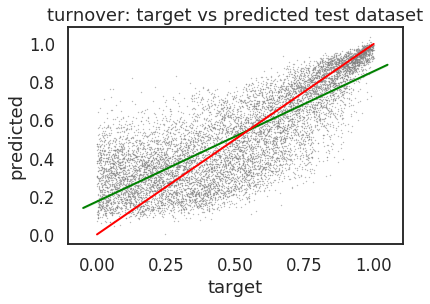

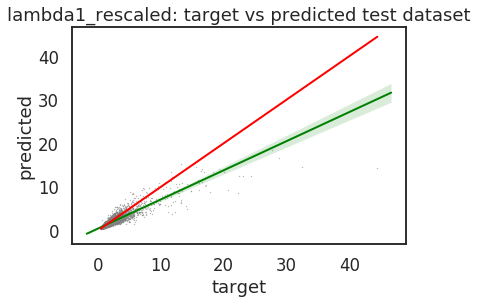

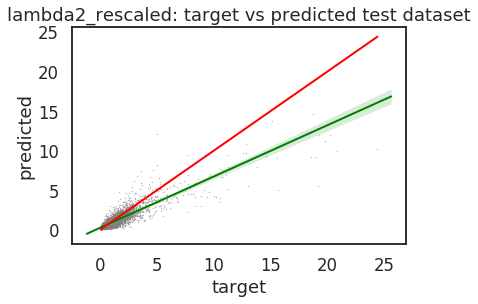

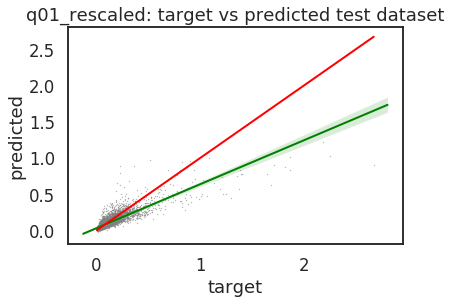

In [16]:
import seaborn as sns
#import statsmodel.formula.api as smf
import matplotlib.pyplot as plt

#Plot test vs predicted
# predict values for the test set
predicted_test = pd.DataFrame(estimator.predict(X_test))
predicted_test.columns = Y_test.columns # rename correctly the columns
predicted_test.index = Y_test.index # rename indexes for correspondence

elts = []

# just for subsetting columns more automatically + naming output plots
for elt in Y_test.columns:
    elts.append(elt)

for elt in elts:
    sub_df = pd.DataFrame({'predicted_minus_target_' + elt: predicted_test[elt] - Y_test[elt], 'target_'+elt: Y_test[elt], 'predicted_'+elt: predicted_test[elt]})
    if elt == elts[0]:
        df = sub_df
    else:
        sub_df.index = df.index
        df = pd.concat([df, sub_df], axis=1)

# fast plotting for analysis (with seaborn):
def target_vs_predicted(target_name, predicted_name, param_name, file_name_beg) : 
    sns.set_style('white')
    sns.set_context('talk')
    sns.regplot(x=target_name, y=predicted_name, data=df, ci=95, n_boot=500, 
                scatter_kws={'s':0.1, 'color':'grey'}, line_kws={ 'color':'green', 'linewidth':2})
    plt.title(param_name + ': target vs predicted test dataset')
    plt.xlabel('target')
    plt.ylabel('predicted')
    innerlimit = min(df[target_name])
    
    outerlimit = max(df[target_name])
    plt.plot([innerlimit, outerlimit], [innerlimit, outerlimit], linewidth=2, color='red')
    plt.show()
    return None

    
for elt in elts:
    target_vs_predicted('target_'+elt, 'predicted_'+elt, elt, file_name_beg=elt)

In [17]:
# table with statistics on errors
errors_index = elts
errors_columns = ['MAE', 'RMSE', 'RME']
errors = pd.DataFrame(index=errors_index, columns=errors_columns)

def get_mae_rmse(name_var):
    predicted_vals = df['predicted_' + name_var]
    target_vals = df['target_' + name_var]
    diffs_abs = abs(target_vals - predicted_vals)
    diffs_rel = diffs_abs/target_vals
    diffs_abs_squared = diffs_abs**2
    mae = np.sum(diffs_abs)/len(diffs_abs)
    rmse = np.sqrt(sum(diffs_abs_squared)/len(diffs_abs_squared))
    rme = np.sum(diffs_rel)/len(diffs_rel)
    return mae, rmse, rme
    

#errors.loc['R_nought'] = np.array(get_mae_rmse('R_nought'))
for elt in errors_index:
    errors.loc[elt] = np.array(get_mae_rmse(elt))

print(errors)

                        MAE       RMSE       RME
turnover           0.133581   0.173845   3.23215
lambda1_rescaled   0.330756   0.781517  0.171907
lambda2_rescaled   0.287444   0.598179  0.381841
q01_rescaled      0.0295792  0.0643398   0.36326


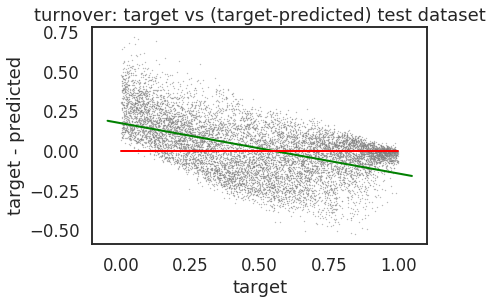

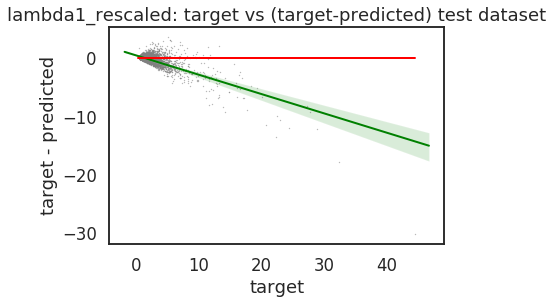

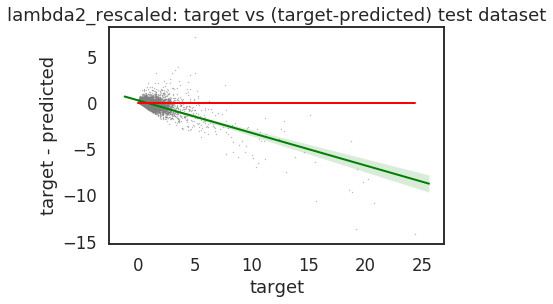

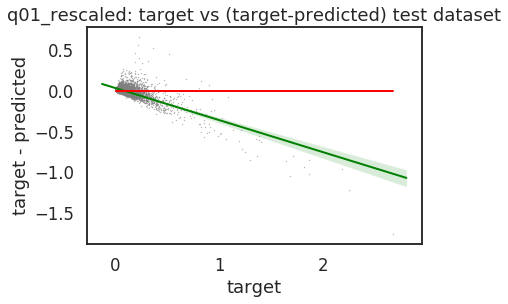

In [18]:
#print differences between predicted and target as function of target: showing structural bias

def predicted_minus_target_vs_target(pr_m_tar_name, target_name, param_name, file_name_beg) : 
    sns.set_style('white')
    sns.set_context('talk')
    sns.regplot(x=target_name, y=pr_m_tar_name, data=df, ci=95, n_boot=500, 
                scatter_kws={'s':0.1, 'color':'grey'}, line_kws={ 'color':'green', 'linewidth':2})
    plt.title(param_name + ': target vs (target-predicted) test dataset')
    plt.xlabel('target')
    plt.ylabel('target - predicted')
    innerlimit = min(df[target_name])
    
    outerlimit = max(df[target_name])
    
    plt.plot([innerlimit, outerlimit], [0, 0], linewidth=2, color='red')
    plt.show()
    return None


for elt in elts:
    predicted_minus_target_vs_target('predicted_minus_target_'+elt, 'target_'+elt, elt, file_name_beg=elt)


In [19]:
#measure of correlation: predicted vs target
from scipy.stats import spearmanr, pearsonr

from sklearn.metrics import r2_score

pearson_cors = []

for elt in elts:
    pearson_cors.append(pearsonr(Y_test[elt], predicted_test[elt])[0])

print("Global pearson correlation between predicted and effective parameter: ", Y_test.columns, pearson_cors)


Global pearson correlation between predicted and effective parameter:  Index(['turnover', 'lambda1_rescaled', 'lambda2_rescaled', 'q01_rescaled'], dtype='object') [0.7974426016543784, 0.9072780145544219, 0.8786417273447854, 0.8567105916011649]


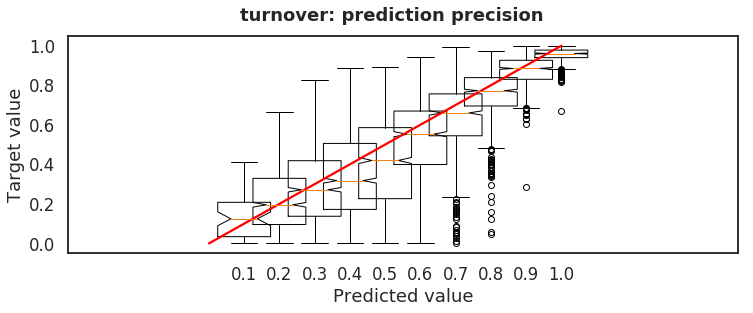

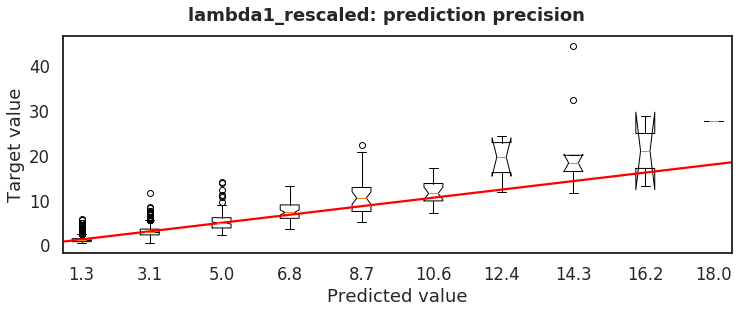

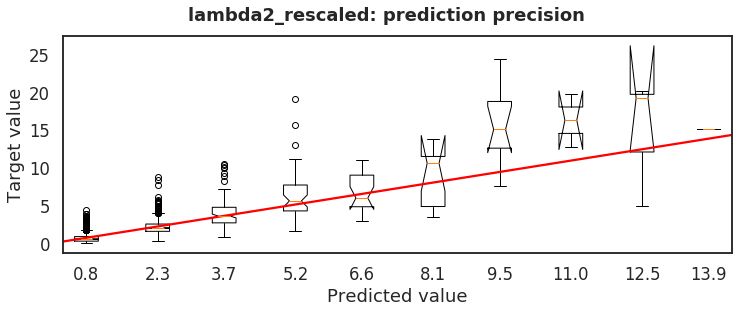

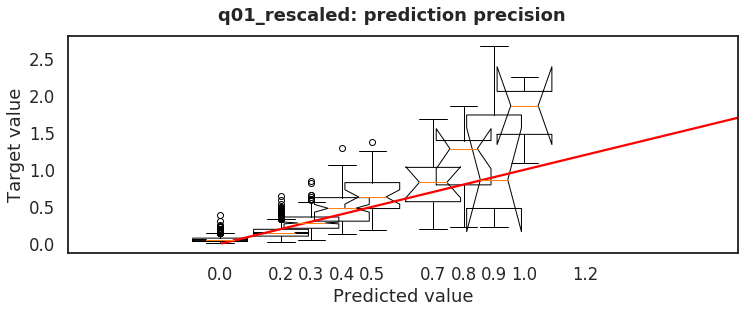

In [20]:
###boxplots

from pylab import *

def sd_bins(name_target, name_predicted, nb_bins):
    b_indexes = np.digitize(df[name_predicted], bins=np.linspace(min(df[name_predicted]),max(df[name_predicted]),num=nb_bins))
    list_sd = []
    x_axis = []
    
    list_b = [[] for i in range(max(b_indexes)-1)]
    for i in range(1, nb_bins):
        list_b[i-1] = np.array(df[name_target][b_indexes == i])
        #print(df[name_target][b_indexes == i])
        #print(i)
        #print(len(df['predicted_minus_target_R_nought'][a_indexes == i]))
        if len(list_b[i-1]) > 1:
            list_sd.append(np.std(list_b[i-1]))
        else :
            list_sd.append([None])
    
    x_bins = np.linspace(min(df[name_predicted]), max(df[name_predicted]), num=nb_bins)
    
    for i in range(0,len(x_bins)-1):
        x_axis.append(float("{0:.1f}".format((x_bins[i]+x_bins[i+1])/2)))
        
    return list_b, list_sd, x_axis        

def plot_boxplot(name_target, name_predicted, nb_bin, maintitle, directory, file_name):
    min_val = min(df[name_target])
    
    max_val = max(df[name_target])
    
    arrays_target, array_sd, position_list = sd_bins(name_target, name_predicted, nb_bins=nb_bin)
    fig = plt.figure(figsize=(12,4))
    fig.suptitle(maintitle, fontsize=18, fontweight='bold')
    
    ax = fig.add_subplot(111)
    ax.boxplot(arrays_target, positions=position_list, notch=True)
    
    ax.set_xlabel('Predicted value')
    ax.set_ylabel('Target value')

    
    plt.plot(np.linspace(min_val, max_val, 5), np.linspace(min_val, max_val, 5), color='red')
    #plt.savefig('../Plots2/' + chemin + file_name + '.png')
    #plt.savefig('../Plots/' + directory + file_name + '.png')
    plt.show()
    return None
    
for elt in elts:
    plot_boxplot('target_'+elt, 'predicted_'+elt, 11, elt+': prediction precision', directory = chemin, file_name='boxplot_' + elt + '_pred_vs_target')

#plot_boxplot('target_sampling_proba','predicted_sampling_proba', 11 , 'Transmission rate: prediction precision', min_val=0, max_val=1, directory = chemin, file_name='boxplot_sampling_proba_pred_vs_target')



In [21]:
###save the model, weights (and scaler for sumstats only)

from keras.models import model_from_json

# save model
model_trial_1000 = model.to_json()
with open('../Model/' + chemin + 'model_all' + expname + '.json','w') as json_file:
    json_file.write(model_trial_1000)

# save weights
model.save_weights('../Model/' + chemin + 'model_all_weights' + expname +'.h5')
print('model saved!')

'''
#load the model
json_file = open('../Model/' + chemin + 'model_all' + expname + '.json', 'r')
loaded_file = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_file)
#load weights
loaded_model.load_weights(../Model/' + chemin + 'model_all_weights' + expname +'.h5'5)
print('model loaded!')

'''

#save scaler when there is one (FFNN-SS)
"""
from sklearn.externals import joblib

scale_filename = '../../Model/' + chemin + 'all_standardscaler' + expname + '.pkl'
joblib.dump(scale, scale_filename)

print('scale saved!')
#load scaler:
#scale = joblib.load(scale_filename)
"""

model saved!


"\nfrom sklearn.externals import joblib\n\nscale_filename = '../../Model/' + chemin + 'all_standardscaler' + expname + '.pkl'\njoblib.dump(scale, scale_filename)\n\nprint('scale saved!')\n#load scaler\n#scale = joblib.load(scale_filename)\n"

In [22]:
####save the predicted and the target dataframes

Y_test.to_csv('../Data/' + chemin + expname + 'target_all.csv', header=True)

predicted_test.to_csv('../Data/' + chemin + expname + 'predicted_all.csv', header=True)

